In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from tensorflow import keras
from keras.layers import Dense, Flatten, AlphaDropout
import keras.callbacks as callbacks;
import os

In [75]:
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
 import time
 run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
 return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [76]:
test = pd.read_csv("Datasets/emnist-balanced-test.csv").to_numpy()
train = pd.read_csv("Datasets/emnist-balanced-train.csv").to_numpy()
train.shape

(112799, 785)

In [77]:
x_train, x_valid = train[5000:, 1:], train[:5000, 1:]
x_train, x_valid = x_train / 255.0, x_valid/ 255.0
y_train, y_valid = train[5000:, 0], train[:5000, 0]

x_train.shape, y_train.shape

((107799, 784), (107799,))

In [78]:
y_train_unique = numpy.unique(y_train)
y_train_unique.size

47

In [79]:
model = keras.models.Sequential([
    Flatten(input_shape=[784]),
    Dense(416, activation="relu"),
    AlphaDropout(rate=0.2),
    Dense(y_train_unique.size, activation="softmax")
])

In [80]:
model.summary(), model.input_shape

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_23 (Dense)            (None, 416)               326560    
                                                                 
 alpha_dropout_2 (AlphaDropo  (None, 416)              0         
 ut)                                                             
                                                                 
 dense_24 (Dense)            (None, 47)                19599     
                                                                 
Total params: 346,159
Trainable params: 346,159
Non-trainable params: 0
_________________________________________________________________


(None, (None, 784))

In [81]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, 
              optimizer=keras.optimizers.SGD(momentum=0.9), 
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [82]:
tensorboard_cb = callbacks.TensorBoard(run_logdir)
early_stopping_cb = callbacks.EarlyStopping(patience=10, restore_best_weights=True)
lr_scheduler_cb = callbacks.ReduceLROnPlateau(factor=0.5, patience=4)
history = model.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), callbacks=[early_stopping_cb, lr_scheduler_cb, tensorboard_cb])

Epoch 1/100
3369/3369 [==============================] - 7s 2ms/step - loss: 1.7051 - sparse_categorical_accuracy: 0.5170 - val_loss: 0.9675 - val_sparse_categorical_accuracy: 0.7268 - lr: 0.0100
Epoch 2/100
3369/3369 [==============================] - 7s 2ms/step - loss: 1.2125 - sparse_categorical_accuracy: 0.6413 - val_loss: 0.8414 - val_sparse_categorical_accuracy: 0.7548 - lr: 0.0100
Epoch 3/100
3369/3369 [==============================] - 7s 2ms/step - loss: 1.0851 - sparse_categorical_accuracy: 0.6748 - val_loss: 0.7754 - val_sparse_categorical_accuracy: 0.7772 - lr: 0.0100
Epoch 4/100
3369/3369 [==============================] - 6s 2ms/step - loss: 1.0144 - sparse_categorical_accuracy: 0.6935 - val_loss: 0.7369 - val_sparse_categorical_accuracy: 0.7856 - lr: 0.0100
Epoch 5/100
3369/3369 [==============================] - 7s 2ms/step - loss: 0.9694 - sparse_categorical_accuracy: 0.7064 - val_loss: 0.7229 - val_sparse_categorical_accuracy: 0.7962 - lr: 0.0100
Epoch 6/100
3369/336

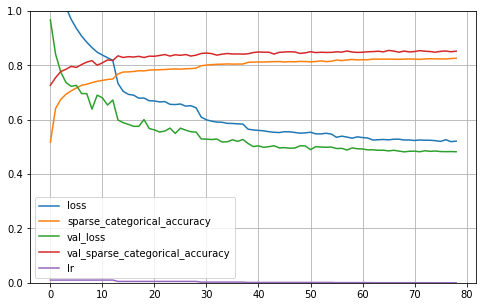

In [83]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [84]:
x_test = test[:3,1:]
x_test = x_test / 255.0
y_test = test[:3, 0]
x_test.shape, y_test.shape

((3, 784), (3,))

In [85]:
y_proba = model.predict(x_test)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.87, 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  ,
        0.11, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.01, 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  ]], dtype=float32)

In [86]:
classes = numpy.argmax(y_proba, axis=1)
classes

array([39,  9, 26], dtype=int64)

In [87]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006
